NLP Training 3: Embeddings
--- 

In [1]:
import os
os.chdir('..')
print(f'Setting working dir to: {os.getcwd()}')

Setting working dir to: /Users/ingomarquart/Documents/GitHub/itern-nlp-training-cases


**Restart the notebook after the following line (when you first download the file)**

In [3]:
!python -m spacy download en_core_web_md 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 21.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## Embeddings

In this notebook we will work with both static and dynamic embeddings.   

We've built a small helper class for you to embed and compare words with a static Word2Vec model,
as well as a dynamic BERT model (both are trained on English texts).

In [4]:
import numpy as np
from utils.helper import HelperModel

nlp = HelperModel(word2vec="en_core_web_md", bert="bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Exercise 1 - Word2Vec

To get word2vec embeddings for all words in a sentence, start out by calling `nlp.word2vecEmbeddings` on the following sentence:
 
 `I left my phone on the left side of the room`

- Find out which size (`shape`) the embedding vectors of the model have
- Next, compare the two embeddings of the word `left`, the one at position `1` (zero-based) and the one at position `6`. How do they relate?
Usually vectors are compared with the cosine similarity, you can do this via `nlp.cosineSimilarity(embedding1, embedding2)`.
- What does this mean for the embeddings? Is there an absolute difference between the two?

In [6]:
text = 'I left my phone on the left side of the room'

# Add your solution here:
# ...

#### Solution

In [7]:

# Run the model and get back tokens and embeddings
(words, embeddings) = nlp.word2vecEmbeddings(text)

print(words)
print(embeddings)

# Get the shape of embeddings
print(f'Embedding shape: {embeddings.shape}')

# And the similary between two words at position 1 and 6
similarity = nlp.cosineSimilarity(embeddings[1,:],embeddings[6,:])
print(f'Similarity between "left" and "left" is: {similarity[0][0]:.5f}')

difference = (embeddings[1,:] - embeddings[6,:]).mean()
print(f'Difference between the embeddings: {difference}')

['I', 'left', 'my', 'phone', 'on', 'the', 'left', 'side', 'of', 'the', 'room']
[[ -1.8607     0.15804   -4.1425   ...   7.9379   -11.57       4.3334  ]
 [  1.6989     5.3603    -0.22365  ...   2.3652    -2.5907    -0.39018 ]
 [  7.0139     3.7598    -9.163    ...   1.2128   -25.256     -7.0021  ]
 ...
 [-12.667     -6.568     -0.61537  ...  -8.0021    -0.31712   -7.7062  ]
 [ -5.1043     2.3496     3.2472   ...  -7.6875    -2.5128     0.69342 ]
 [  2.7518     2.1166    -5.8193   ...   3.4374    -4.5271     0.052845]]
Embedding shape: (11, 300)
Similarity between "left" and "left" is: 1.00000
Difference between the embeddings: 0.0


### Exercise 2 - Working with Embeddings

Word2Vec is trained on a large (Wikipedia and then some) size dataset, referred to as a corpus. But it is still quite common for highly specific words to not appear during training, which means that there is no available vector for the word and also no way of inferring one. It is also quite common for models to use only the 10.000 to 30.000 most common words, or one's that occur at least N amount of times in the whole text, with a common cutoff threshold being 5 or 10.
 
- Come up with a sentence that includes a word not learnt by the model

To better visualize the similarity of words or their respective embeddings, we can look at their latent space distribution. Usually this is done by reducing the dimensionality of the embeddings to either 2 or 3, with methods like PCA or t-SNE.

- Get Embeddings for all words in the trained vocab, use the `.getAllWord2Vec()`-method for this
- Run a PCA with two extracted components on the embeddings
- Compare the sizes between the original embeddings and the output from the PCA by looking at their respective shapes

We can now visualize 2d vectors.    
We expect related vectors/points to be closer, and unrelated to be further apart in the (reduced) latent space.   
 
- First we pick some word pairs to visualize how they relate
- Extract the respective embeddings on the previously created 2d projection (from the PCA)
- Visualize the 2d representation using a 2d scatter plot

The same method can be used to inspect the latent space of many neural networks, for instance in computer vision. This also helps 'Explainable AI' endeavours, as one can more easily identify the visual features/attributes the network considers similar.


In [ ]:
# Add your solution here:
# ...

#### Solution

No vectors exist for the following words, as they were not in the training vocabulary:
[Bierbelohnung]
result includes all available vectors
['After', 'the', 'workshop', ',', 'there', 's', 'a']
Org. shape: (514157, 300) vs. PCA  shape: (514157, 2)


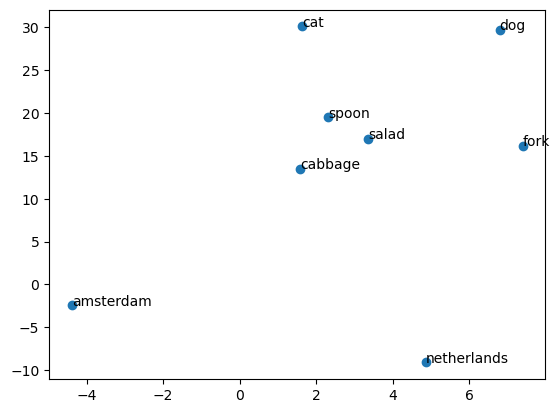

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Bierbelohnung is probably not in the vocab
(words, embeddings) = nlp.word2vecEmbeddings('After the workshop, theres a Bierbelohnung')
print(words)


# Returns all words (vocabulary) of the model plus their embeddings
words, vectors = nlp.getAllWord2Vec()

# Specify to how many components/dimensions we wish to reduce the embeddings (2)
pca = PCA(n_components=2)
# Fit the model and transform the data in question 
pca_vectors = pca.fit_transform(vectors)

print(f'Org. shape: {vectors.shape} vs. PCA  shape: {pca_vectors.shape}')

# list of words to compare and visualize 
pairs = ['salad', 'cabbage', 'spoon', 'fork', 'cat', 'dog', 'netherlands', 'amsterdam']

# get their word indices from the model, which correspond to the indices the 
# vectors have in our matrix
pairs_index = [words.index(word) for word in pairs]
# get the respective PCA vectors for each word
pairs_pca = np.array([pca_vectors[i] for i in pairs_index])

# scatter plot the 2d embeddings as points
fig, ax = plt.subplots()
ax.scatter(pairs_pca[:,0],pairs_pca[:,1])

# annotate points with the corresponding word
for i, txt in enumerate(pairs):
    ax.annotate(txt, (pairs_pca[i,0], pairs_pca[i,1]))

### Exercise 3 - BERT

We have already seen that word2vec produces "static" embeddings. Next we want to explore "dynamic" embeddings using BERT.   
Out helper class implements a `.bertEmbeddings()`-method to do so.

- Use BERT to create embeddings for both sentences below
- Repeat the comparision from exercise 1 for the two appearances of "left" in the first sentence.

As BERT embeddings are context dependent, we don't expect embeddings for the same word to be exactly identical. 
- Calculate the similarity between the first `left` in `sentence_1` and the first `left` in `sentence_2`


In [9]:
sentence_1 = 'I left my phone on the left side of the room'
sentence_2 = 'I left my phone on the right side of the room'

# Add your solution here:
# ...

#### Solution

In [10]:
embeddings_left = nlp.bertEmbeddings(sentence_1)
embeddings_right = nlp.bertEmbeddings(sentence_2)

# Similary between "left" and "left" in sentece_1
similarity = nlp.cosineSimilarity(embeddings_left[1,:],embeddings_left[6,:])
print(f'Similarity between "left" and "left" in sentence_1 is: {similarity[0][0]:.5f}')

# Similary between "left" and "left" in sentence_1 and sentece_2
similarity = nlp.cosineSimilarity(embeddings_left[1,:],embeddings_right[1,:])
print(f'Similarity of "left" between sentence_1 and sentence_2: {similarity[0][0]:.5f}')

Similarity between "left" and "left" in sentence_1 is: 0.42872
Similarity of "left" between sentence_1 and sentence_2: 0.99887


### Exercise 4 - Sentence/Paragraph Embeddings

Language models are very versatile in their application, as the pre-trained model is basically only an encoder, which can then be used or fine-tuned for tasks like text classification, named entity recognition, neural search, etc..

Having looked at word embeddings, we can now aggregate them to represent whole sentences or paragraphs or documents. For instance, Facebook Research StarSpace calls this process 'Entity Embeddings', where an entity's representation is an aggregation of the sub-entities' embeddings.   
For example, a text representation can be achieved by aggregating all word embeddings from the text. The most common practice is to simply take the mean over all word embeddings.

- Make up 3 sentences, so that two cover a similar topic (with different words) and one is completely unrelated, and get their BERT word embeddings.
- Now take the mean of each sentence' word embeddings. Careful: Specify the axis for the mean, so that the resulting embedding is of shape `(1,768)`, the default size for a BERT word embedding

Having averaged the embeddings, this information can now be used to compares sentences (or even documents).

- Calculate the cosine similarities between the three sentence embeddings. You can call `np.array( [ emb1, emb2,... ] )` to get a single array, which if passed to the sklearn `cosine_similarity` will calculate the similarity matrix between all embeddings.
- Print the matrix and finally call `np.argsort` on a row, which will give you the document/sentence ids ordered by ascending similarity.

This could be used for neural-search i.e. information retrieval methods.

In [11]:
# Add your solution here:
# ...

#### Solution

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

words_sent1 = nlp.bertEmbeddings('I love eating ice cream on hot summer days.')
words_sent2 = nlp.bertEmbeddings('The car mechanic repaired the exhaust, which had become very rusty over time.')
words_sent3 = nlp.bertEmbeddings('My motorcycle got an inspection at my local garage.')

# Mean of embeddings
emb_sent1 = words_sent1.mean(axis=0)
emb_sent2 = words_sent2.mean(axis=0)
emb_sent3 = words_sent3.mean(axis=0)

# Use the CLS token
cls1 =words_sent1[0,:]
cls2 =words_sent2[0,:]
cls3 =words_sent3[0,:]

emb_cls_matrix = np.array([cls1, cls2, cls3])
sim_cls_matrix = cosine_similarity(emb_cls_matrix)

# Similarity between sentences
emb_matrix = np.array([emb_sent1,emb_sent2,emb_sent3])
sim_matrix = cosine_similarity(emb_matrix)
print(sim_matrix, '\n')
print(sim_cls_matrix, '\n')

print('Most similar sentences to sentence number', i:=1)
# argsort gives us the indices of a list/array sorted by value ascending
# since we want the most similar document first (sort by value descending),
# we multiplpy the sim_matrix with -1 as there is no ascending/descending 
# parameter in argsort
print(np.argsort(-1 * sim_matrix)[i])

print(np.argsort(-1 * sim_cls_matrix)[i])

[[1.         0.80336318 0.81190729]
 [0.80336318 1.         0.85349237]
 [0.81190729 0.85349237 1.        ]] 

[[1.         0.93506982 0.94619393]
 [0.93506982 1.         0.96195278]
 [0.94619393 0.96195278 1.        ]] 

Most similar sentences to sentence number 1
[1 2 0]
[1 2 0]


Observe that the embeddings are overall very similar.

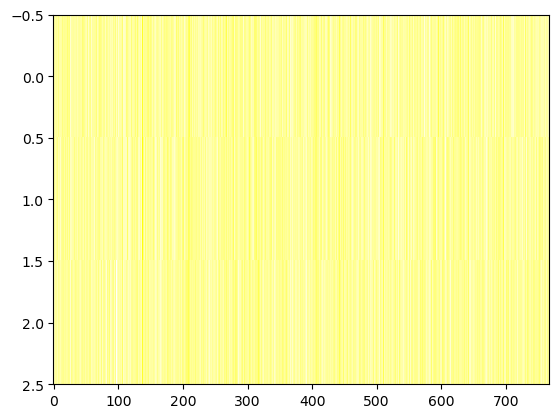

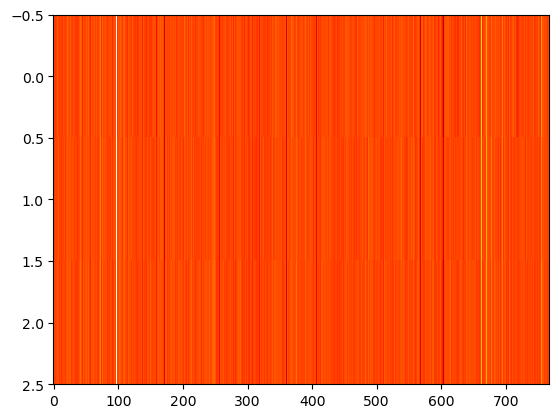

In [16]:
plt.imshow(emb_matrix, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

plt.imshow(emb_cls_matrix, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

In practice, pooling or averaging sentences with BERT is not ideal.

Instead, we would use a sentence transformer model, like SentenceBERT. These models train their encoders on the sentences and get sentence embeddings that are much better!